# Using Ragas to Evaluate a RAG Application built with LangChain and LangGraph

In the following notebook, we'll be looking at how [Ragas](https://github.com/explodinggradients/ragas) can be helpful in a number of ways when looking to evaluate your RAG applications!

While this example is rooted in LangChain/LangGraph - Ragas is framework agnostic (you don't even need to be using a framework!).

- 🤝 Breakout Room #1
  1. Task 1: Installing Required Libraries
  2. Task 2: Set Environment Variables
  3. Task 3: Synthetic Dataset Generation for Evaluation using Ragas
  4. Task 4: Evaluating our Pipeline with Ragas
  5. Task 6: Making Adjustments and Re-Evaluating

But first! Let's set some dependencies!

## Dependencies and API Keys:

We'll also need to provide our API keys.

First, OpenAI's for our LLM/embedding model combination!

In [1]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

## Generating Synthetic Test Data

We wil be using Ragas to build out a set of synthetic test questions, references, and reference contexts. This is useful because it will allow us to find out how our system is performing.

> NOTE: Ragas is best suited for finding *directional* changes in your LLM-based systems. The absolute scores aren't comparable in a vacuum.

### Data Preparation

We'll prepare our data - which should hopefull be familiar at this point since it's our Loan Data use-case!

Next, let's load our data into a familiar LangChain format using the `DirectoryLoader`.

In [2]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader


path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

### Knowledge Graph Based Synthetic Generation

Ragas uses a knowledge graph based approach to create data. This is extremely useful as it allows us to create complex queries rather simply. The additional testset complexity allows us to evaluate larger problems more effectively, as systems tend to be very strong on simple evaluation tasks.

Let's start by defining our `generator_llm` (which will generate our questions, summaries, and more), and our `generator_embeddings` which will be useful in building our graph.

### Abstracted SDG

The above method is the full process - but we can shortcut that using the provided abstractions!

This will generate our knowledge graph under the hood, and will - from there - generate our personas and scenarios to construct our queries.



In [3]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

/Users/chenshuzhou/workspace/AIE7/08_Evaluating_RAG_With_Ragas/.venv/lib/python3.13/site-packages/pysbd/segmenter.py:66: SyntaxWarning: invalid escape sequence '\s'
  for match in re.finditer('{0}\s*'.format(re.escape(sent)), self.original_text):
/Users/chenshuzhou/workspace/AIE7/08_Evaluating_RAG_With_Ragas/.venv/lib/python3.13/site-packages/pysbd/lang/arabic.py:29: SyntaxWarning: invalid escape sequence '\.'
  txt = re.sub('(?<={0})\.'.format(am), '∯', txt)
/Users/chenshuzhou/workspace/AIE7/08_Evaluating_RAG_With_Ragas/.venv/lib/python3.13/site-packages/pysbd/lang/persian.py:29: SyntaxWarning: invalid escape sequence '\.'
  txt = re.sub('(?<={0})\.'.format(am), '∯', txt)


In [4]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs[:20], testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/17 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/20 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node


Applying SummaryExtractor:   0%|          | 0/31 [00:00<?, ?it/s]

Property 'summary' already exists in node 'ce6569'. Skipping!
Property 'summary' already exists in node 'e8f464'. Skipping!
Property 'summary' already exists in node '97e091'. Skipping!
Property 'summary' already exists in node '1a4d8f'. Skipping!
Property 'summary' already exists in node '518e94'. Skipping!
Property 'summary' already exists in node 'e1146c'. Skipping!
Property 'summary' already exists in node 'dbcdd8'. Skipping!
Property 'summary' already exists in node 'e2e02c'. Skipping!
Property 'summary' already exists in node 'c33b9c'. Skipping!
Property 'summary' already exists in node '20c3c8'. Skipping!
Property 'summary' already exists in node 'c20eae'. Skipping!
Property 'summary' already exists in node 'c6107a'. Skipping!
Property 'summary' already exists in node '49bf2f'. Skipping!
Property 'summary' already exists in node '419571'. Skipping!


Applying CustomNodeFilter:   0%|          | 0/6 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/41 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node 'c20eae'. Skipping!
Property 'summary_embedding' already exists in node '419571'. Skipping!
Property 'summary_embedding' already exists in node 'e1146c'. Skipping!
Property 'summary_embedding' already exists in node 'c6107a'. Skipping!
Property 'summary_embedding' already exists in node '49bf2f'. Skipping!
Property 'summary_embedding' already exists in node '97e091'. Skipping!
Property 'summary_embedding' already exists in node 'c33b9c'. Skipping!
Property 'summary_embedding' already exists in node '1a4d8f'. Skipping!
Property 'summary_embedding' already exists in node 'e8f464'. Skipping!
Property 'summary_embedding' already exists in node '518e94'. Skipping!
Property 'summary_embedding' already exists in node '20c3c8'. Skipping!
Property 'summary_embedding' already exists in node 'dbcdd8'. Skipping!
Property 'summary_embedding' already exists in node 'ce6569'. Skipping!
Property 'summary_embedding' already exists in node 'e2e02c'. Sk

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/12 [00:00<?, ?it/s]

In [5]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,What is Scheduled Academic Year and how it use...,"[non-term (includes clock-hour calendars), or ...",Scheduled Academic Year (SAY) is used for moni...,single_hop_specifc_query_synthesizer
1,What are the exceptions to the normal loan per...,[Inclusion of Clinical Work in a Standard Term...,"See Volume 8, Chapter 3 for additional guidanc...",single_hop_specifc_query_synthesizer
2,Whaat is the reqquirement for disbursment of T...,[Non-Term Characteristics A program that measu...,"Title IV program disbursements, except for Fed...",single_hop_specifc_query_synthesizer
3,How Direct Loan Program work if student finish...,[both the credit or clock hours and the weeks ...,"For the Direct Loan Program, if a student in a...",single_hop_specifc_query_synthesizer
4,if a school got a standard term program but wa...,[<1-hop>\n\nnon-term (includes clock-hour cale...,if a school got a standard term program and wa...,multi_hop_abstract_query_synthesizer
5,How do the disbursement timing requirements fo...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
6,How do the disbursement timing requirements fo...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
7,What are the differences in disbursement timin...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
8,According to the guidance provided in Volume 8...,[<1-hop>\n\nInclusion of Clinical Work in a St...,"Volume 8, Chapter 3 provides guidance on excep...",multi_hop_specific_query_synthesizer
9,how appendix a and appendix b help with unders...,[<1-hop>\n\nboth the credit or clock hours and...,appendix a gives examples that show how the ru...,multi_hop_specific_query_synthesizer


## LangChain RAG

Now we'll construct our LangChain RAG, which we will be evaluating using the above created test data!

### R - Retrieval

Let's start with building our retrieval pipeline, which will involve loading the same data we used to create our synthetic test set above.

> NOTE: We need to use the same data - as our test set is specifically designed for this data.

In [6]:
path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

Now that we have our data loaded, let's split it into chunks!

In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

1102

#### ❓ Question: 

What is the purpose of the `chunk_overlap` parameter in the `RecursiveCharacterTextSplitter`?

Next up, we'll need to provide an embedding model that we can use to construct our vector store.

In [8]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

Now we can build our in memory QDrant vector store.

In [9]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="loan_data",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="loan_data",
    embedding=embeddings,
)

We can now add our documents to our vector store.

In [10]:
_ = vector_store.add_documents(documents=split_documents)

Let's define our retriever.

In [11]:
retriever = vector_store.as_retriever(search_kwargs={"k": 5})

Now we can produce a node for retrieval!

In [12]:
def retrieve(state):
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

### Augmented

Let's create a simple RAG prompt!

In [13]:
from langchain.prompts import ChatPromptTemplate

RAG_PROMPT = """\
You are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.

### Question
{question}

### Context
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

### Generation

We'll also need an LLM to generate responses - we'll use `gpt-4o-nano` to avoid using the same model as our judge model.

In [14]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano")

Then we can create a `generate` node!

In [15]:
def generate(state):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = rag_prompt.format_messages(question=state["question"], context=docs_content)
  response = llm.invoke(messages)
  return {"response" : response.content}

### Building RAG Graph with LangGraph

Let's create some state for our LangGraph RAG graph!

In [16]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

Now we can build our simple graph!

> NOTE: We're using `add_sequence` since we will always move from retrieval to generation. This is essentially building a chain in LangGraph.

In [17]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

Let's do a test to make sure it's doing what we'd expect.

In [18]:
response = graph.invoke({"question" : "What are the different kinds of loans?"})

In [19]:
response["response"]

'Based on the provided context, the different kinds of loans mentioned are:\n\n1. **Direct Loans** - These include various types of federal student loans that are originated through the Department of Education, such as the Direct Unsubsidized Loan and potentially others implied by the context.\n\n2. **Direct Unsubsidized Loan** - A specific type of Direct Loan where interest accrues during school and other periods, and the borrower has the option to pay the interest while in school.\n\nThe context primarily discusses the administration and transfer of these loans rather than listing all specific types, but it emphasizes the existence of the Direct Loan program and the Direct Unsubsidized Loan as key types.'

## Evaluating the App with Ragas

Now we can finally do our evaluation!

We'll start by running the queries we generated usign SDG above through our application to get context and responses.

In [20]:
for test_row in dataset:
  response = graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

In [21]:
dataset.samples[0].eval_sample.response

"A Scheduled Academic Year (SAY) is a defined period used for monitoring student progress and determining eligibility for Title IV federal student aid programs, such as the Direct Loan annual loan limit and Pell Grant awards. It typically corresponds to a traditional academic calendar, usually beginning and ending at consistent times each year, such as from the start of the fall semester to the end of the spring semester.\n\nThe use of SAY varies depending on the type of academic calendar:\n\n1. **Standard Term Academic Calendar**:  \n   - Comprises semesters, trimesters, or quarters that start and end within set time frames.  \n   - An SAY for such programs generally includes fall and spring terms (and possibly summer), constituting one academic year.  \n   - The SAY begins at the start of the fall term and ends at the conclusion of the spring term.  \n   - It is used to monitor progression, determine loan limits, and calculate Pell Grant awards.\n\n2. **Nonstandard Term Academic Cale

Then we can convert that table into a `EvaluationDataset` which will make the process of evaluation smoother.

In [22]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

In [44]:
evaluation_dataset

EvaluationDataset(features=['user_input', 'retrieved_contexts', 'reference_contexts', 'response', 'reference'], len=12)

We'll need to select a judge model - in this case we're using the same model that was used to generate our Synthetic Data.

In [23]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))

Next up - we simply evaluate on our desired metrics!

In [36]:
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, ResponseRelevancy, ContextEntityRecall, NoiseSensitivity
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=360)

result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

Exception raised in Job[5]: TimeoutError()


{'context_recall': 0.8383, 'faithfulness': 0.9044, 'factual_correctness': 0.6658, 'answer_relevancy': 0.9414, 'context_entity_recall': 0.3229, 'noise_sensitivity_relevant': 0.2248}

## Making Adjustments and Re-Evaluating

Now that we've got our baseline - let's make a change and see how the model improves or doesn't improve!

> NOTE: This will be using Cohere's Rerank model - please be sure to [sign-up for an API key!](https://docs.cohere.com/reference/about)

In [25]:
os.environ["COHERE_API_KEY"] = getpass("Please enter your Cohere API key!")


We'll first set our retriever to return more documents, which will allow us to take advantage of the reranking.

In [26]:
adjusted_example_retriever = vector_store.as_retriever(search_kwargs={"k": 20})

Reranking, or contextual compression, is a technique that uses a reranker to compress the retrieved documents into a smaller set of documents.

This is essentially a slower, more accurate form of semantic similarity that we use on a smaller subset of our documents.

In [27]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

def retrieve_adjusted(state):
  compressor = CohereRerank(model="rerank-v3.5")
  compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=adjusted_example_retriever, search_kwargs={"k": 5}
  )
  retrieved_docs = compression_retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

We can simply rebuild our graph with the new retriever!

In [28]:
class AdjustedState(TypedDict):
  question: str
  context: List[Document]
  response: str

adjusted_graph_builder = StateGraph(AdjustedState).add_sequence([retrieve_adjusted, generate])
adjusted_graph_builder.add_edge(START, "retrieve_adjusted")
adjusted_graph = adjusted_graph_builder.compile()

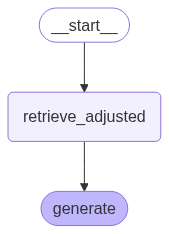

In [29]:
adjusted_graph

In [30]:
response = adjusted_graph.invoke({"question" : "What are the different kinds of loans?"})
response["response"]

'The context mentions different loan types including:\n\n- Federal PLUS Loans\n- Direct Subsidized Loans\n- Direct Unsubsidized Loans\n\nThese are the main kinds of loans referenced in the provided information.'

In [32]:
import time
import copy

rerank_dataset = copy.deepcopy(dataset)

for test_row in rerank_dataset:
  response = adjusted_graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]
  time.sleep(5) # To try to avoid rate limiting.

In [33]:
rerank_dataset.samples[0].eval_sample.response

"A Scheduled Academic Year (SAY) is a framework used for monitoring the progression of students' federal loan limits, such as the Direct Loan annual loan limit. It helps determine how much students can borrow within a specified academic cycle.\n\nThe use of SAY and related Base Year (BBAY) periods varies depending on the type of academic calendar:\n\n- **Standard Term or Nonstandard Term Calendar:**  \n  An academic calendar with defined terms (such as semesters, trimesters, or quarters) has set start and end dates. In these calendars, the SAY typically encompasses the entire academic year, which generally includes fall and spring terms. The SAY is used for tracking loan limits and aid eligibility across these terms.\n\n- **Non-Term Calendar:**  \n  In a non-term calendar, classes do not begin and end within fixed periods, and academic progress may be measured in credit or clock hours rather than terms. For Title IV purposes, a program with terms might sometimes be treated as non-term,

In [34]:
rerank_evaluation_dataset = EvaluationDataset.from_pandas(rerank_dataset.to_pandas())

In [53]:
rerank_evaluation_dataset[10]

SingleTurnSample(user_input='how do you figure out when a student can get a pell grant disbursement in a clock-hour or non-term credit-hour program, and how does this relate to the way payment periods and terms are set up in non-term or subscription-based academic calendars?', retrieved_contexts=['both the credit or clock hours and the weeks of instructional time in a payment period before receiving a disbursement of\nPell Grant, FSEOG, TEACH Grant or Direct Loan funds for the next payment period. For the Direct Loan Program only, this\nsame requirement applies to students who are enrolled in programs with nonstandard terms that are not substantially\nequal in length.\nEffect of Accelerated Progression on Disbursement Timing in a Clock-Hour or Non-Term Credit-Hour Program\nThe Pell Grant or TEACH Grant amount that a student is eligible to receive for a payment period in a clock-hour or non-\nterm credit-hour program is based on the number of hours and weeks in the scheduled payment per

In [54]:
evaluation_dataset[10]

SingleTurnSample(user_input='how do you figure out when a student can get a pell grant disbursement in a clock-hour or non-term credit-hour program, and how does this relate to the way payment periods and terms are set up in non-term or subscription-based academic calendars?', retrieved_contexts=['The first payment period is the period in which the student successfully completes half of the credit or clock hours\nand half of the weeks of instructional time in the program.\nThe second payment period is the period in which the student completes the remainder of the program.\nClock-Hour and Non-Term Program Payment Periods for Programs More Than One Academic Year in Length\nFor the first academic year of the program and for any subsequent full academic year, follow the payment period\nrules above for a program that is one academic year or less in length, substituting <academic year= for <program.=\nAcademic Year = 24 Semester Hours and 30 Weeks of Instructional Time\nPell Grant: Payment p

In [55]:
result = evaluate(
    dataset=rerank_evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

{'context_recall': 0.8353, 'faithfulness': 0.8355, 'factual_correctness': 0.6600, 'answer_relevancy': 0.9448, 'context_entity_recall': 0.3402, 'noise_sensitivity_relevant': 0.2618}

In [50]:
result.binary_columns

[]

#### ❓ Question: 

Which system performed better, on what metrics, and why?



#### ✅ answer: 
notes: the evaluation score will change with each run. I think we need to fix the result by setting temperature or seeds, otherise not much sense in comparing two moving targets.

Baseline RAG: 
{'context_recall': 0.8383, 'faithfulness': 0.9044, 'factual_correctness': 0.6658, 'answer_relevancy': 0.9414, 'context_entity_recall': 0.3229, 'noise_sensitivity_relevant': 0.2248}

Adjusted RAG:
{'context_recall': 0.9008, 'faithfulness': 0.8405, 'factual_correctness': 0.6075, 'answer_relevancy': 0.9448, 'context_entity_recall': 0.3218, 'noise_sensitivity_relevant': 0.2351}

- context recall, answer relevancy: Adjusted RAG is better. It finds more relevant information by using the reranking model. 
- faithfulness, factual correctness, context entity recall, noise sensitivity: Baseline rag is better. 
  - Faithfulness (+7.6%): More faithful to retrieved context, suggesting cosine similarity retrieval patterns align better with the LLM's processing
  - Factual Correctness (+9.6%): Significantly more accurate facts, indicating cosine similarity may retrieve more factually dense content
  - Context Entity Recall (+0.3%): Slightly better at capturing specific entities (names, dates, numbers)
  - Noise Sensitivity (+4.6%): Better at handling irrelevant information

Despite better retrieval, the reranking system produced less faithful and less factually correct answers because:
Context Processing Mismatch: The LLM may be optimized for processing cosine similarity-retrieved context patterns
Relevance vs. Factual Density Trade-off: Reranking optimized for semantic relevance rather than factual completeness
Information Synthesis Challenges: More "relevant" context doesn't always mean easier to synthesize into accurate answers
